In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [4]:
y = df['price']

<Axes: xlabel='area', ylabel='price'>

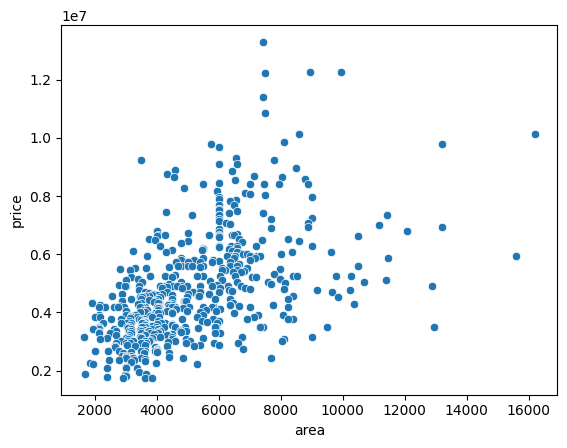

In [5]:
sns.scatterplot(data=df, x='area', y='price')

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [8]:
ln = LinearRegression()

In [11]:
ref = RFE(ln, n_features_to_select=5)

In [13]:
ref.fit(df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']],y)

ValueError: could not convert string to float: 'yes'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [25]:
df_road_encoded = pd.get_dummies(df['mainroad'],prefix='mainroad',columns=['mainroad'])

In [27]:
df = pd.concat([df,df_road_encoded], axis=1)

In [29]:
df_guest_room = pd.get_dummies(df['guestroom'],prefix='guestroom',columns=['guestroom'])

In [30]:
df = pd.concat([df,df_guest_room], axis=1)

In [32]:
df_basement_encoded = pd.get_dummies(df['basement'],prefix='basement',columns=['basement']) 
df = pd.concat([df,df_basement_encoded], axis=1)

In [34]:
df_hotwater_encoded = pd.get_dummies(df['hotwaterheating'],prefix='hotwaterheating',columns=['hotwaterheating'])
df = pd.concat([df,df_hotwater_encoded], axis=1)

In [18]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [19]:
df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64